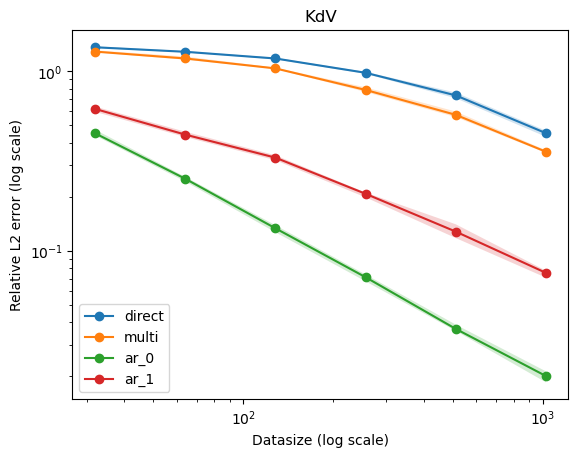

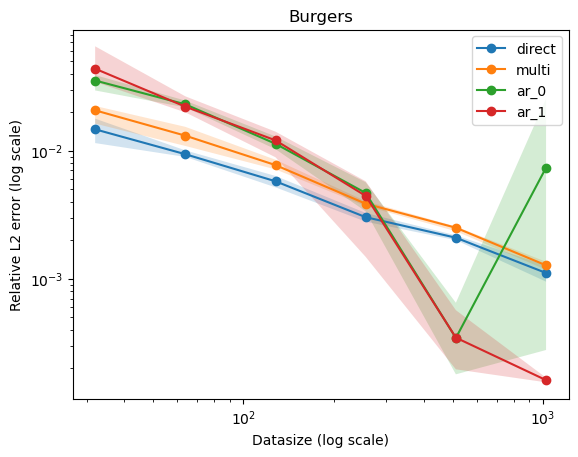

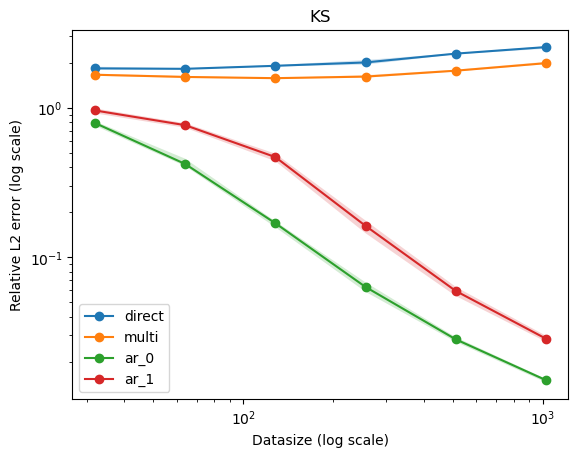

In [1]:
import torch


import os
import re


# Find file that starts with 'results_Burgers_ar_0' in the folder 'results'


def find_files(folder, pattern):
    files = os.listdir(folder)
    return [f for f in files if re.match(pattern, f)]



from matplotlib import pyplot as plt

for equation in ['KdV', 'Burgers', 'KS']:

    plt.figure()

    for experiment in ['direct', 'multi', 'ar_0', 'ar_1']:
        folder = 'results'
        pattern = f'results_{equation}_{experiment}.*'
        files = find_files(folder, pattern)
        file = files[-1]

        results = torch.load(f'{folder}/{file}')
        datasize_list = results[0]['datasize']
        results_list = [results[i]['rel_l2'] for i in range(5)]
        results_list = torch.tensor(results_list)
        mean = results_list.mean(dim=0)
        std = results_list.std(dim=0)
        max = results_list.max(dim=0).values
        min = results_list.min(dim=0).values
        plt.plot(datasize_list, mean, 'o-', label=f'{experiment}')
        plt.fill_between(datasize_list, max, min, alpha=0.2)
        plt.xscale('log')
        plt.yscale('log')
        plt.xlabel('Datasize (log scale)')
        plt.ylabel('Relative L2 error (log scale)')
        plt.title(f'{equation}')
        plt.legend()
